In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 简单线性回归的实现

只有一个样本特征, 及只有一个变量： y = kx + b

最优化损失函数：

$$
\sum_{i=1}^{m}\left(y^{(i)}-a x^{(i)}-b\right)^{2}
$$

使用最小二乘法问题: 最小化误差的平方

$$
\left\{\begin{array}
\hat a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)\left(y^{(i)}-\bar{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)^{2}} \\
\hat b=\bar{y}-a \bar{x} \\
\end{array}\right.
$$



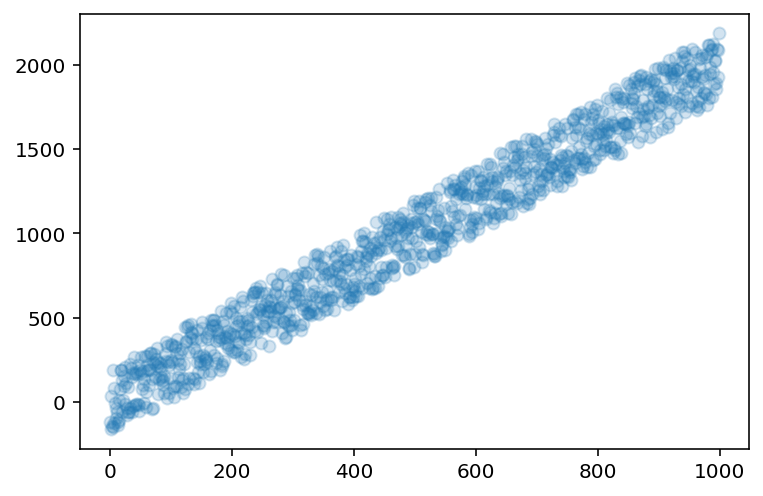

In [2]:
SIZE = 1000
UNDULATE = 200

x = np.arange(SIZE)
y = x * 2 + np.random.randint(-UNDULATE, UNDULATE, size=SIZE)

plt.scatter(x, y, alpha=0.2)
plt.show()


### 线性回归实现

In [3]:
class SimpleLinerRegression():
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = 0
        for x_item, y_item in zip(x, y):
            molecule += (x_item-x_avg) * (y_item-y_avg)

        denominator = 0
        for item in x:
            denominator += pow((item-x_avg), 2)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 17.3 ms, sys: 820 µs, total: 18.1 ms
Wall time: 18.6 ms
a= 2.0006101766101767
b= 1.2352167832167424


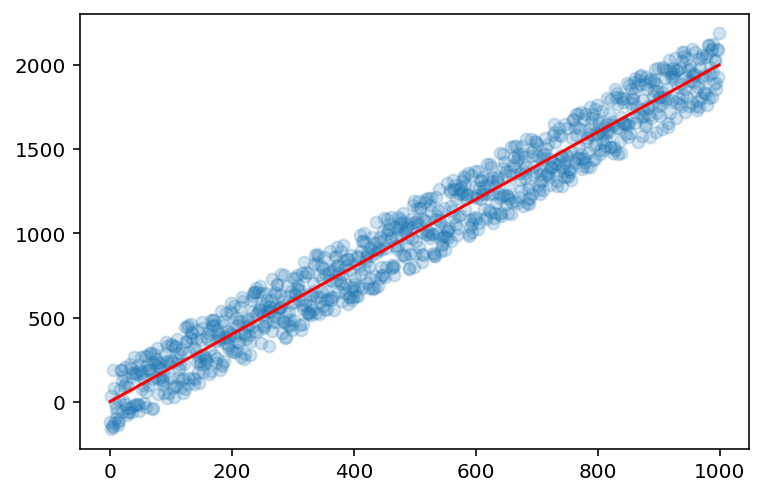

In [4]:
obj =  SimpleLinerRegression()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y, alpha=0.2)
plt.plot(x, y_predict, color='r')
plt.show()

### 使用向量计算优化
使用向量计算，避免走循环计算。可以大幅度提高效率。

In [5]:
class SimpleLinerRegression2():
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = np.dot(x-x_avg, y-y_avg)
        denominator = np.dot(x-x_avg, x-x_avg)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 926 µs, sys: 160 µs, total: 1.09 ms
Wall time: 6.61 ms
a= 2.0006101766101767
b= 1.2352167832167424


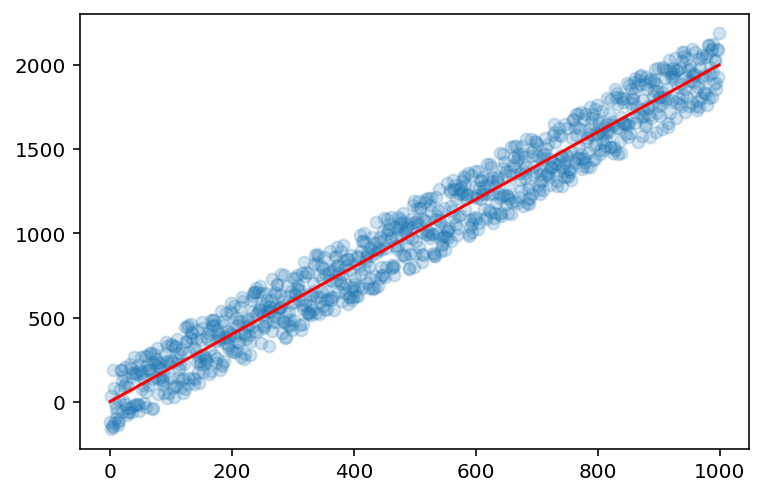

In [6]:
obj =  SimpleLinerRegression2()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y, alpha=0.2)
plt.plot(x, y_predict, color='r')
plt.show()

### 使用sklearn自带的函数

In [7]:
from sklearn.linear_model import LinearRegression

# 待补充

## 模型评价

### MSE

$$
\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}
$$

In [8]:
np.dot(y_predict - y, y_predict - y) / len(y)

13076.929373739727

### RMSE

$$
\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{\text {tare }}^{(10)}-\dot{y}_{\text {irst }}^{(i)}\right)^{2}}=\sqrt{M S E_{\text {tert }}}
$$

In [9]:
import math
math.sqrt(np.dot(y_predict - y, y_predict - y) / len(y))

114.35440251140193

### MAE

$$
\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|
$$

In [10]:
np.sum(np.absolute(y-y_predict)) / len(y)

99.05954456599257

### R Square

$$
1-\frac{M S E(\hat{y}, y)}{\operatorname{Var}(y)}
$$

In [11]:
1 - np.dot(y_predict - y, y_predict - y)/len(y)/np.var(y) 

0.9622722861563375

## 多元线性回归

使目标函数尽可能小: 
$$
\sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}
$$


$$
\left\{\begin{array}
\hat X_{0}^{(i)} = 1 \\
\hat{y}^{(i)}=\theta_{0} X_{0}^{(i)}+\theta_{1} X_{1}^{(i)}+\theta_{2} X_{2}^{(i)}+\ldots+\theta_{n} X_{n}^{(i)}
\end{array}\right.
$$

=>

$$
\left\{\begin{array}
\hat \theta=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right)^{T} \\
\hat X_{}^{(i)}=\left(X_{0}^{(i)}, X_{1}^{(i)}, X_{2}^{(i)}, \ldots, X_{n}^{(i)}\right) \\
\hat{y}^{(i)}=X^{(i)} \cdot \theta  \\
\end{array}\right.
$$

=>

$$
X_{b}=\left(\begin{array}{ccccc}
1 & X_{1}^{(1)} & X_{2}^{(1)} & \ldots & X_{n}^{(1)} \\
1 & X_{1}^{(2)} & X_{2}^{(2)} & \ldots & X_{n}^{(2)} \\
\ldots & & & & \ldots \\
1 & X_{1}^{(m)} & X_{2}^{(m)} & \ldots & X_{n}^{(m)}
\end{array}\right) \quad \theta=\left(\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\ldots \\
\theta_{n}
\end{array}\right)
$$

=> 最终推导出(多元线性回归的正规方程解(Normal Euqation))

$$
\theta=\left(X_{b}^{T} X_{b}\right)^{-1} X_{b}^{T} y
$$

- 优点: 不需要对数据做归一化处理
- 缺点: 时间复杂度高 O(n^3) 优化到O(n^2.4)
